<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [157]:
df=pd.read_csv('/content/car_price_prediction.csv.zip')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [158]:
df.shape

(19237, 18)

In [160]:

df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [162]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [163]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


DATA CLEANING AND PRE PROCESSING

In [164]:
df.duplicated().sum()

313

In [165]:
from pandas._libs.hashtable import duplicated
df.drop_duplicates(inplace=True)

In [166]:
df.shape #This DataSet Contains 18924 rows & 18 columns after removing duplicates.

(18924, 18)

In [167]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [168]:
df['Levy'].head() #It is observed that Levy column the DataSet contains '-' symbol insted of a int variable.So we will replace '-' symbol with a '0' and change the datatype of this column to integer type.

0    1399
1    1018
2       -
3     862
4     446
Name: Levy, dtype: object

In [169]:
df['Levy']=df['Levy'].replace(['-'],['0']) # replace '-' to '0' and change the dtype as int (earlier it was object)
df['Levy']=df['Levy'].astype(str).astype(int)

In [170]:
df['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64

In [171]:
df['Engine volume'].value_counts() # here  i am observing that engine volume having float and variable both the in same column so will have to replace 'tubro' to '' and convert its type to float.

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [172]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo', '')
df['Engine volume']=df['Engine volume'].astype(str).astype('float')

In [173]:
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [174]:
df['Doors'].value_counts() #The column 'Doors' in the dataset requires some cleaning .
            #Instead of the number of doors present in the car we get to see dates which are irrelevant to the dataset and the particular column.

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [175]:
df['Doors']=df['Doors'].str.replace('04-May','04-05')
df['Doors']=df['Doors'].str.replace('02-Mar','02-05')
df['Doors']

0        04-05
1        04-05
2        04-05
3        04-05
4        04-05
         ...  
19232    02-05
19233    04-05
19234    04-05
19235    04-05
19236    04-05
Name: Doors, Length: 18924, dtype: object

In [176]:
df['Mileage'] #Since the mileage column consists of the distance travelled with value such as "...km" the column is categorised as object datatype.Convert it to 'int' datatype.

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [177]:
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).replace("km"," "))
df['Mileage'] = df['Mileage'].astype('str').astype('int')

In [46]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64

In [178]:
df.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
12140,45757788,13485,934,FORD,Fusion,2015,Sedan,No,Petrol,2.5,122395,4.0,Automatic,Front,04-05,Left wheel,Grey,0
19067,45787854,7213,0,OPEL,Combo,2003,Goods wagon,No,Diesel,1.7,253033,4.0,Manual,Front,02-05,Left wheel,Black,1
16444,45654706,20071,1292,MERCEDES-BENZ,GLE 350,2016,Jeep,Yes,Petrol,3.0,62938,6.0,Automatic,4x4,04-05,Left wheel,Black,0
6782,45809250,32973,640,CHEVROLET,Captiva,2013,Jeep,Yes,Diesel,2.0,62707,4.0,Automatic,Front,04-05,Left wheel,White,4
11034,45732103,48403,765,HYUNDAI,Santa FE,2015,Jeep,Yes,Diesel,2.0,110000,4.0,Automatic,Front,04-05,Left wheel,White,4
19015,45792899,4000,0,FORD,Transit,1991,Microbus,No,Diesel,2.5,4911,4.0,Manual,Rear,04-05,Left wheel,Orange,1
17676,45789893,5237,1708,SSANGYONG,REXTON,2007,Jeep,Yes,Diesel,2.7,75813,4.0,Automatic,Front,04-05,Left wheel,Silver,4
14848,45803905,21395,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,144918,4.0,Automatic,Front,04-05,Left wheel,White,4
2467,45771485,282,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,218126,8.0,Automatic,4x4,04-05,Left wheel,Black,0
9478,45801602,20266,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.6,106400,4.0,Automatic,Front,04-05,Left wheel,Silver,4


In [179]:
df_new=df.copy()
df_new.drop(['ID'], axis=1, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

Exploratory Data Analysis

In [180]:
df_new.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


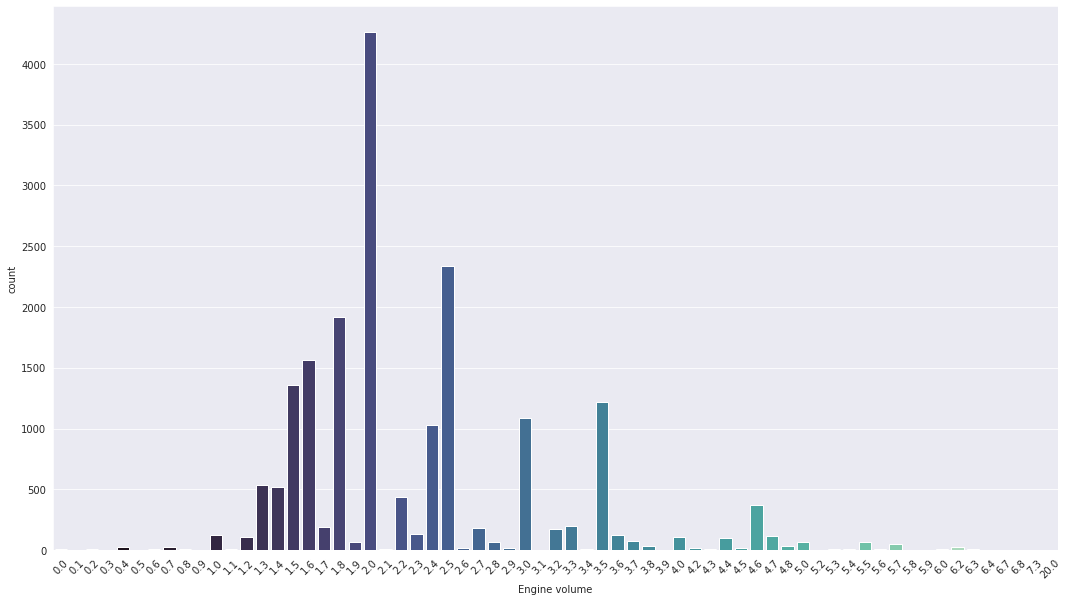

In [181]:
plt.figure(figsize=(18,10))
c1=sns.countplot(x='Engine volume',data=df_new,palette="mako")
plt.xticks(rotation=45)
plt.show()

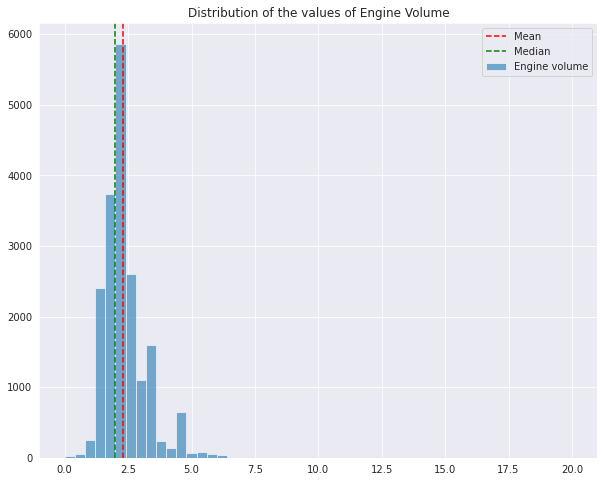

In [182]:
plt.figure(figsize=(10,8))
plt.title("Distribution of the values of Engine Volume")
df_new['Engine volume'].hist(bins=50, label='Engine volume', alpha=0.6)
plt.axvline(np.mean(df_new['Engine volume']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_new['Engine volume']), ls='--', c='g', label="Median")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



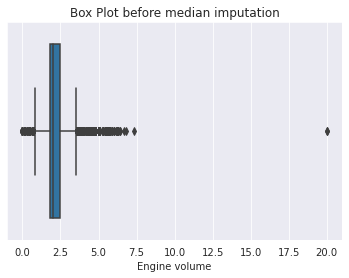

In [183]:
sns.boxplot(df_new['Engine volume']) # outlier detection
plt.title("Box Plot before median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



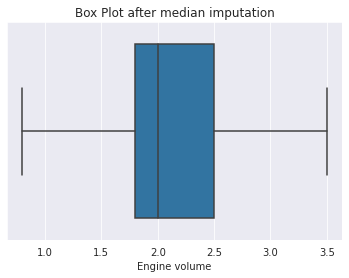

In [184]:
q1 = df_new['Engine volume'].quantile(0.25)
q3 = df_new['Engine volume'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_new['Engine volume'])
for i in df_new['Engine volume']:
    if i > Upper_tail or i < Lower_tail:
            df_new['Engine volume'] = df_new['Engine volume'].replace(i, med)
sns.boxplot(df_new['Engine volume'])
plt.title("Box Plot after median imputation")
plt.show()    

In [185]:
Mileage = df_new.Mileage.value_counts().head(20)
Mileage

0         714
200000    181
150000    159
160000    120
180000    117
100000    105
1000      100
170000     99
120000     98
130000     84
111111     81
140000     73
190000     71
250000     67
300000     67
145000     63
80000      62
110000     61
220000     59
240000     59
Name: Mileage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



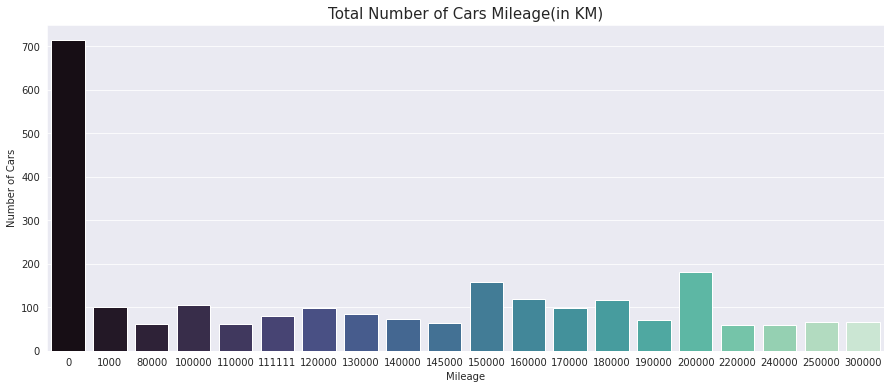

In [186]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.title('Total Number of Cars Mileage(in KM)',fontsize=15)
sns.set_style("darkgrid")
c1=sns.barplot(Mileage.index,Mileage,palette="mako")
c1.set(xlabel='Mileage', ylabel='Number of Cars')
plt.show()

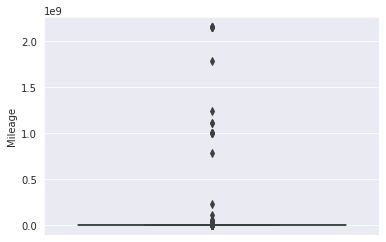

In [187]:
sns.boxplot(y = df_new.Mileage)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



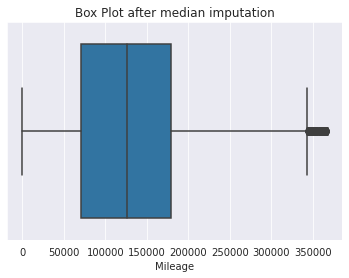

In [188]:

q1 = df_new['Mileage'].quantile(0.25)
q3 = df_new['Mileage'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_new['Mileage'])
for i in df_new['Mileage']:
    if i > Upper_tail or i < Lower_tail:
            df_new['Mileage'] = df_new['Mileage'].replace(i, med)
sns.boxplot(df_new['Mileage'])
plt.title("Box Plot after median imputation")
plt.show()    

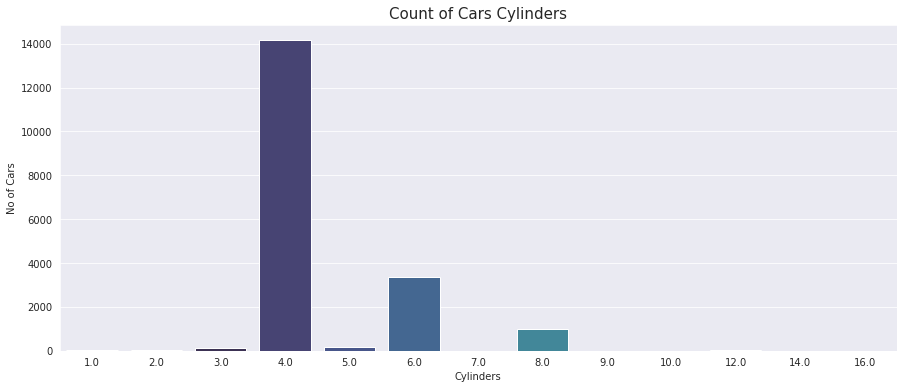

In [189]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.title('Count of Cars Cylinders',fontsize=15)
sns.set_style("darkgrid")
c1=sns.countplot(x='Cylinders',data=df_new,palette="mako")
c1.set(xlabel='Cylinders', ylabel='No of Cars')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



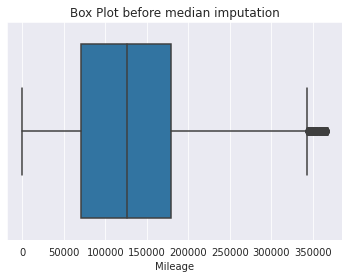

In [190]:
sns.boxplot(df_new['Mileage'])
plt.title("Box Plot before median imputation")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



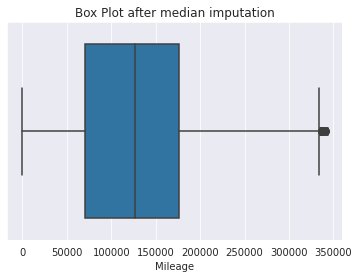

In [191]:
q1 = df_new['Mileage'].quantile(0.25)
q3 = df_new['Mileage'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_new['Mileage'])
for i in df_new['Mileage']:
    if i > Upper_tail or i < Lower_tail:
            df_new['Mileage'] = df_new['Mileage'].replace(i, med)
sns.boxplot(df_new['Mileage'])
plt.title("Box Plot after median imputation")
plt.show()    

In [192]:
df_new['Airbags'].value_counts()

4     5733
12    5534
0     2384
8     1569
6     1289
2     1051
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: Airbags, dtype: int64

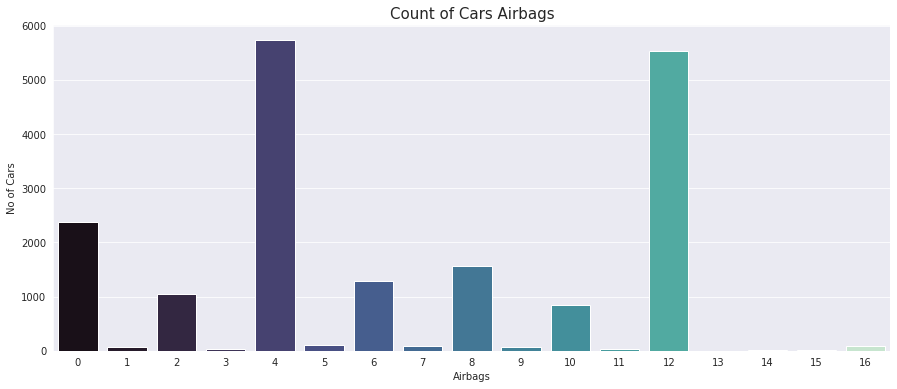

In [193]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.title('Count of Cars Airbags',fontsize=15)
sns.set_style("darkgrid")
c1=sns.countplot(x='Airbags',data=df_new,palette="mako")
c1.set(xlabel='Airbags', ylabel='No of Cars')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



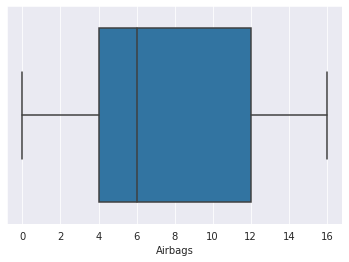

In [194]:
sns.boxplot(df_new['Airbags'])

In [195]:
fig = px.treemap(data_frame=df_new,path=["Manufacturer","Category","Model"],title='MANUFACTURER WISE DATA DISTRIBUTION')
fig.show()


In [196]:
fig = px.treemap(data_frame=df_new,path=["Manufacturer","Category","Model"],values='Price',title='MANUFACTURER WISE TOTAL PRICE | SALES DISTRIBUTION')
fig.show()

JEEPS AND SEDANS ARE PREFERED MORE OVER ANY OTHER CATEGOIES OF 4 WHEELERS FOLLOWED BY HATCHBACKS.

ON A COMFORT LEVEL CARS WITH AUTOMATIC TRANSMISSION , LEFT WHEELED AND LEATHERD INTERIORS ARE PREFFERED THE MOST.

ON FUELTYPE AND PERFORMANCE PETROL TYPE ARE PREFFERED THE MOST.

WE CAN SAY ECONOMIC CARS ARE PREFFERED MORE AS WE GET TO SEE 2L ENGINE , FRONT WHEEL DRIVE BASED CARS & Cars WITH NO TURBO HAVE HIGHEST PREFERENCES.

COLOR PREFRENCES ARE PRETTY MUCH EXPECTED (BLACK WHITE SILVER and GREY).

IN TERMS OF SALES HYUNDAI DOMINATES THE MARKET WITH TOTAL SALE OF 18,41,93,610 followed by TOYOTA, MERCEDES and OPEL

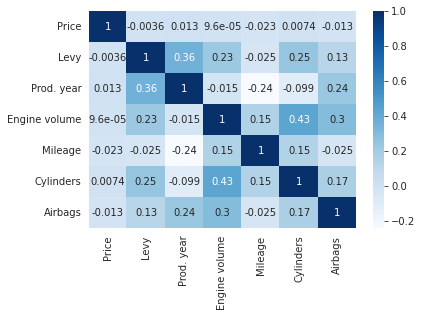

In [197]:
sns.heatmap(data=df_new.corr(),cmap='Blues',annot=True)
plt.show()

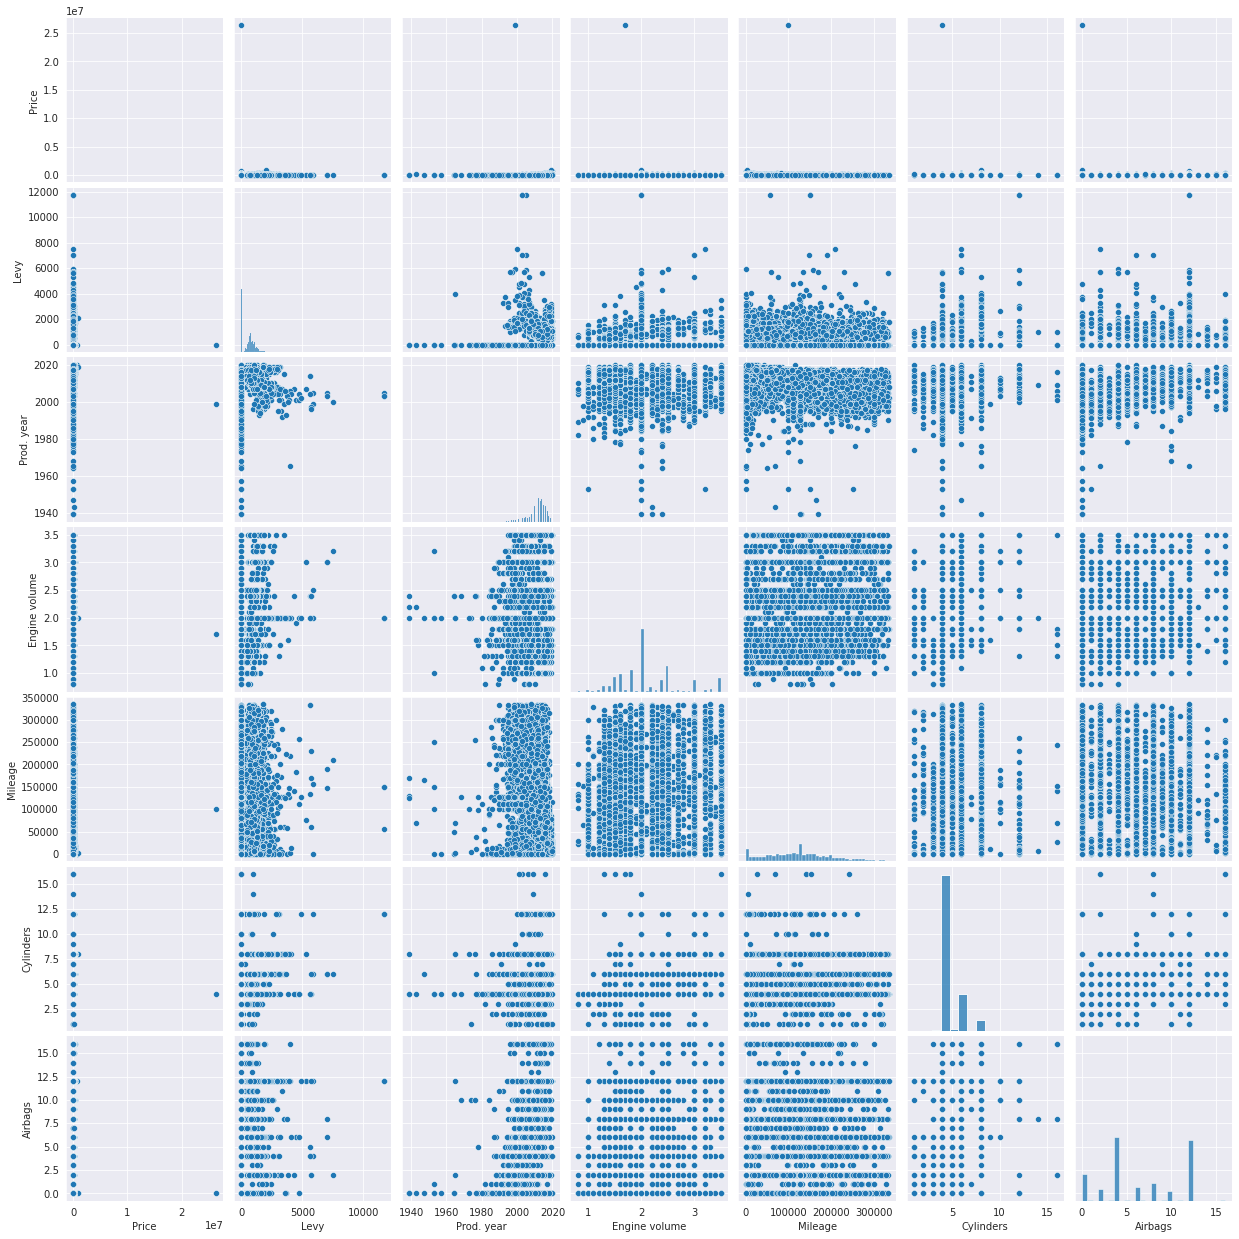

In [82]:
sns.pairplot(df_new)
plt.show()

THERE IS NO REMARKABLE TREND FOR PRICE WITH RESPECT  TO ANY OF THE NUMERICAL COLUMNS SURE DO HAVE EXTREME POINTS WHICH NEED TO BE EXPLORED FURTHER.

In [198]:
fuel_type= df_new['Fuel type'].value_counts()
fuel_type

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



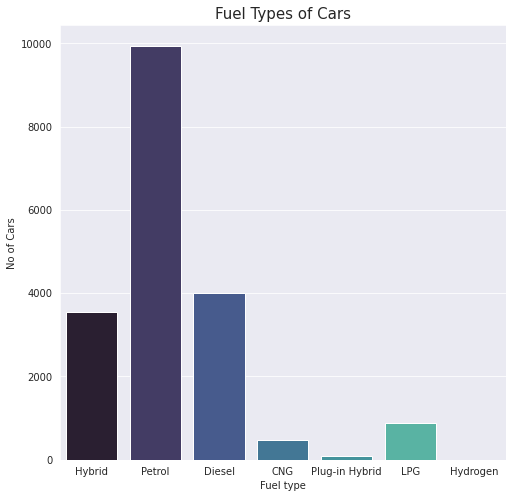

In [199]:
plt.figure(figsize=(8,8))
plt.title("Fuel Types of Cars",fontsize=15)
Leatherint = df_new['Fuel type'].value_counts()
c1=sns.countplot(df_new['Fuel type'],palette="mako")
c1.set(xlabel='Fuel type',ylabel='No of Cars')
plt.show()

In [200]:
df_new['Drive wheels'].value_counts()

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

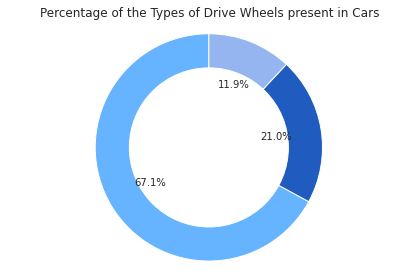

In [201]:
sizes =  df_new['Drive wheels'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors,autopct='%1.1f%%', startangle=90)
plt.title("Percentage of the Types of Drive Wheels present in Cars",fontsize=12)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

TRAIN TEST SPLIT

In [202]:
print('This are the numerical columns: ', numeric_cols)
print('This are the categorical columns: ', categorical_cols)

This are the numerical columns:  ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
This are the categorical columns:  ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


We defined new variables here to seperate the dataset into training input and target column. After which we seperated the numerical columns from the categorical columns so that the scaling of the numerical and the ecoding of the categorical columns will be easier to define

In [210]:
num_df = df[['Price','Levy','Prod. year','Mileage','Cylinders','Airbags']]
cat_df=df[['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']]

In [211]:
for feature in cat_df.columns:
    cats_list=cat_df[feature].value_counts().sort_values(ascending=False).head(10).index
    cats_list=list(cats_list)
    for categories in cats_list:
        cat_df[categories]=np.where(cat_df[feature]==categories,1,0)
    cat_df.drop(columns=[feature], inplace=True)
cat_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,HONDA,LEXUS,NISSAN,VOLKSWAGEN,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [212]:
final_df = pd.concat([num_df, cat_df], axis=1)
final_df.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,13328,1399,2010,186005,6.0,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,16621,1018,2011,192000,6.0,8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8467,0,2006,200000,4.0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3607,862,2011,168966,4.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,11726,446,2014,91901,4.0,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [213]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
final_df=pd.DataFrame(scaler.fit_transform(final_df),columns=final_df.columns)
final_df.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,0.009323,0.825518,-0.333333,0.501202,2.0,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.206132,0.410033,-0.166667,0.551613,2.0,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.281198,-0.700109,-1.000000,0.618883,0.0,-0.50,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.571659,0.239913,-0.166667,0.357926,0.0,-0.75,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.086421,-0.213740,0.333333,-0.290093,0.0,-0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
features = list(final_df.columns)
features.remove('Price')
target = ['Price']
features = final_df[features]
label = final_df[target]
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=1)

In [215]:
from sklearn import metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(len(test_features),1)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(float(np.mean(errors))))
    print(f'MAE: {metrics.mean_absolute_error(test_labels, predictions)}')
    print(f'RMSE: {metrics.mean_squared_error(test_labels, predictions,squared=False)}')
    print(f'R^2: {metrics.r2_score(test_labels, predictions)}')
    print(f'MSE: {metrics.mean_squared_error(test_labels, predictions)}')
    return metrics.r2_score(test_labels, predictions)


In [216]:
base_model = RandomForestRegressor()
base_model.fit(train_features, train_labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [217]:
base_r2_train = evaluate(base_model, train_features, train_labels)

Model Performance
Average Error: 0.2277 degrees.
MAE: 0.22765609611274076
RMSE: 5.88098786557231
R^2: 0.8025956722140766
MSE: 34.586018275008755


In [218]:
base_r2_test = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.4775 degrees.
MAE: 0.47751837335768066
RMSE: 9.302691163951344
R^2: -47.14204748888438
MSE: 86.54006289185841


In [219]:
base_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}